In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import datetime

In [2]:
df = pd.read_csv(Path('JNorth_Milkweed_First_Site.csv'))
df.head()
df.dtypes

Unnamed: 0         int64
id                 int64
sighting_date     object
species           object
number             int64
latitude         float64
longitude        float64
flag_location      int64
comments          object
school            object
grade            float64
image_url         object
customerid         int64
number_old       float64
flag_number        int64
species_old       object
flag_species       int64
dtype: object

In [3]:
# adding a column for year
df['year'] = pd.DatetimeIndex(df['sighting_date']).year
df.head()
df.dtypes

Unnamed: 0         int64
id                 int64
sighting_date     object
species           object
number             int64
latitude         float64
longitude        float64
flag_location      int64
comments          object
school            object
grade            float64
image_url         object
customerid         int64
number_old       float64
flag_number        int64
species_old       object
flag_species       int64
year               int64
dtype: object

In [4]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['sighting_date']).month
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
0,4355,978202507,2000-12-30,Milkweed (FIRST sighted),1,28.529,-96.679,0,"A ""last milkweed of the year"" report: As of D...",Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,(Monarch) Milkweed emerges,1,2000,12
1,4366,981670521,2001-02-07,Milkweed (FIRST sighted),1,29.805,-98.413,0,I was clearing some old milkweed stalks in the...,-999999.999,-999999.999,-999999.999,9901002,-999999.999,1,(Monarch) Milkweed emerges,1,2001,2
2,4367,981927477,2001-02-09,Milkweed (FIRST sighted),1,29.047,-82.046,0,As I went out to my butterfly garden to survey...,Lake weir middle,6.000,-999999.999,9705812,-999999.999,1,(Monarch) Milkweed emerges,1,2001,2
3,4371,982259763,2001-02-15,Milkweed (FIRST sighted),1,30.420,-87.224,0,poking up through the mulch of one of our butt...,-999999.999,-999999.999,-999999.999,2331,-999999.999,1,(Monarch) Milkweed emerges,1,2001,2
4,4380,982949107,2001-02-10,Milkweed (FIRST sighted),1,30.178,-95.504,0,We have milkweed leaves that have been out for...,Holy oak catholic homeschool,-999999.999,-999999.999,9922693,-999999.999,1,(Monarch) Milkweed emerges,1,2001,2


In [5]:
# combining the year and month
df['month_and_year'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month,month_and_year
0,4355,978202507,2000-12-30,Milkweed (FIRST sighted),1,28.529,-96.679,0,"A ""last milkweed of the year"" report: As of D...",Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,(Monarch) Milkweed emerges,1,2000,12,2000-12-01
1,4366,981670521,2001-02-07,Milkweed (FIRST sighted),1,29.805,-98.413,0,I was clearing some old milkweed stalks in the...,-999999.999,-999999.999,-999999.999,9901002,-999999.999,1,(Monarch) Milkweed emerges,1,2001,2,2001-02-01
2,4367,981927477,2001-02-09,Milkweed (FIRST sighted),1,29.047,-82.046,0,As I went out to my butterfly garden to survey...,Lake weir middle,6.000,-999999.999,9705812,-999999.999,1,(Monarch) Milkweed emerges,1,2001,2,2001-02-01
3,4371,982259763,2001-02-15,Milkweed (FIRST sighted),1,30.420,-87.224,0,poking up through the mulch of one of our butt...,-999999.999,-999999.999,-999999.999,2331,-999999.999,1,(Monarch) Milkweed emerges,1,2001,2,2001-02-01
4,4380,982949107,2001-02-10,Milkweed (FIRST sighted),1,30.178,-95.504,0,We have milkweed leaves that have been out for...,Holy oak catholic homeschool,-999999.999,-999999.999,9922693,-999999.999,1,(Monarch) Milkweed emerges,1,2001,2,2001-02-01


In [6]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["month_and_year"]).count()
counts = counts.reset_index()
counts.head(200)

,month_and_year,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
0,2000-12-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2001-02-01,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2,2001-03-01,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
3,2001-04-01,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
4,2001-05-01,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2020-03-01,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
119,2020-04-01,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318
120,2020-05-01,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413
121,2020-06-01,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35


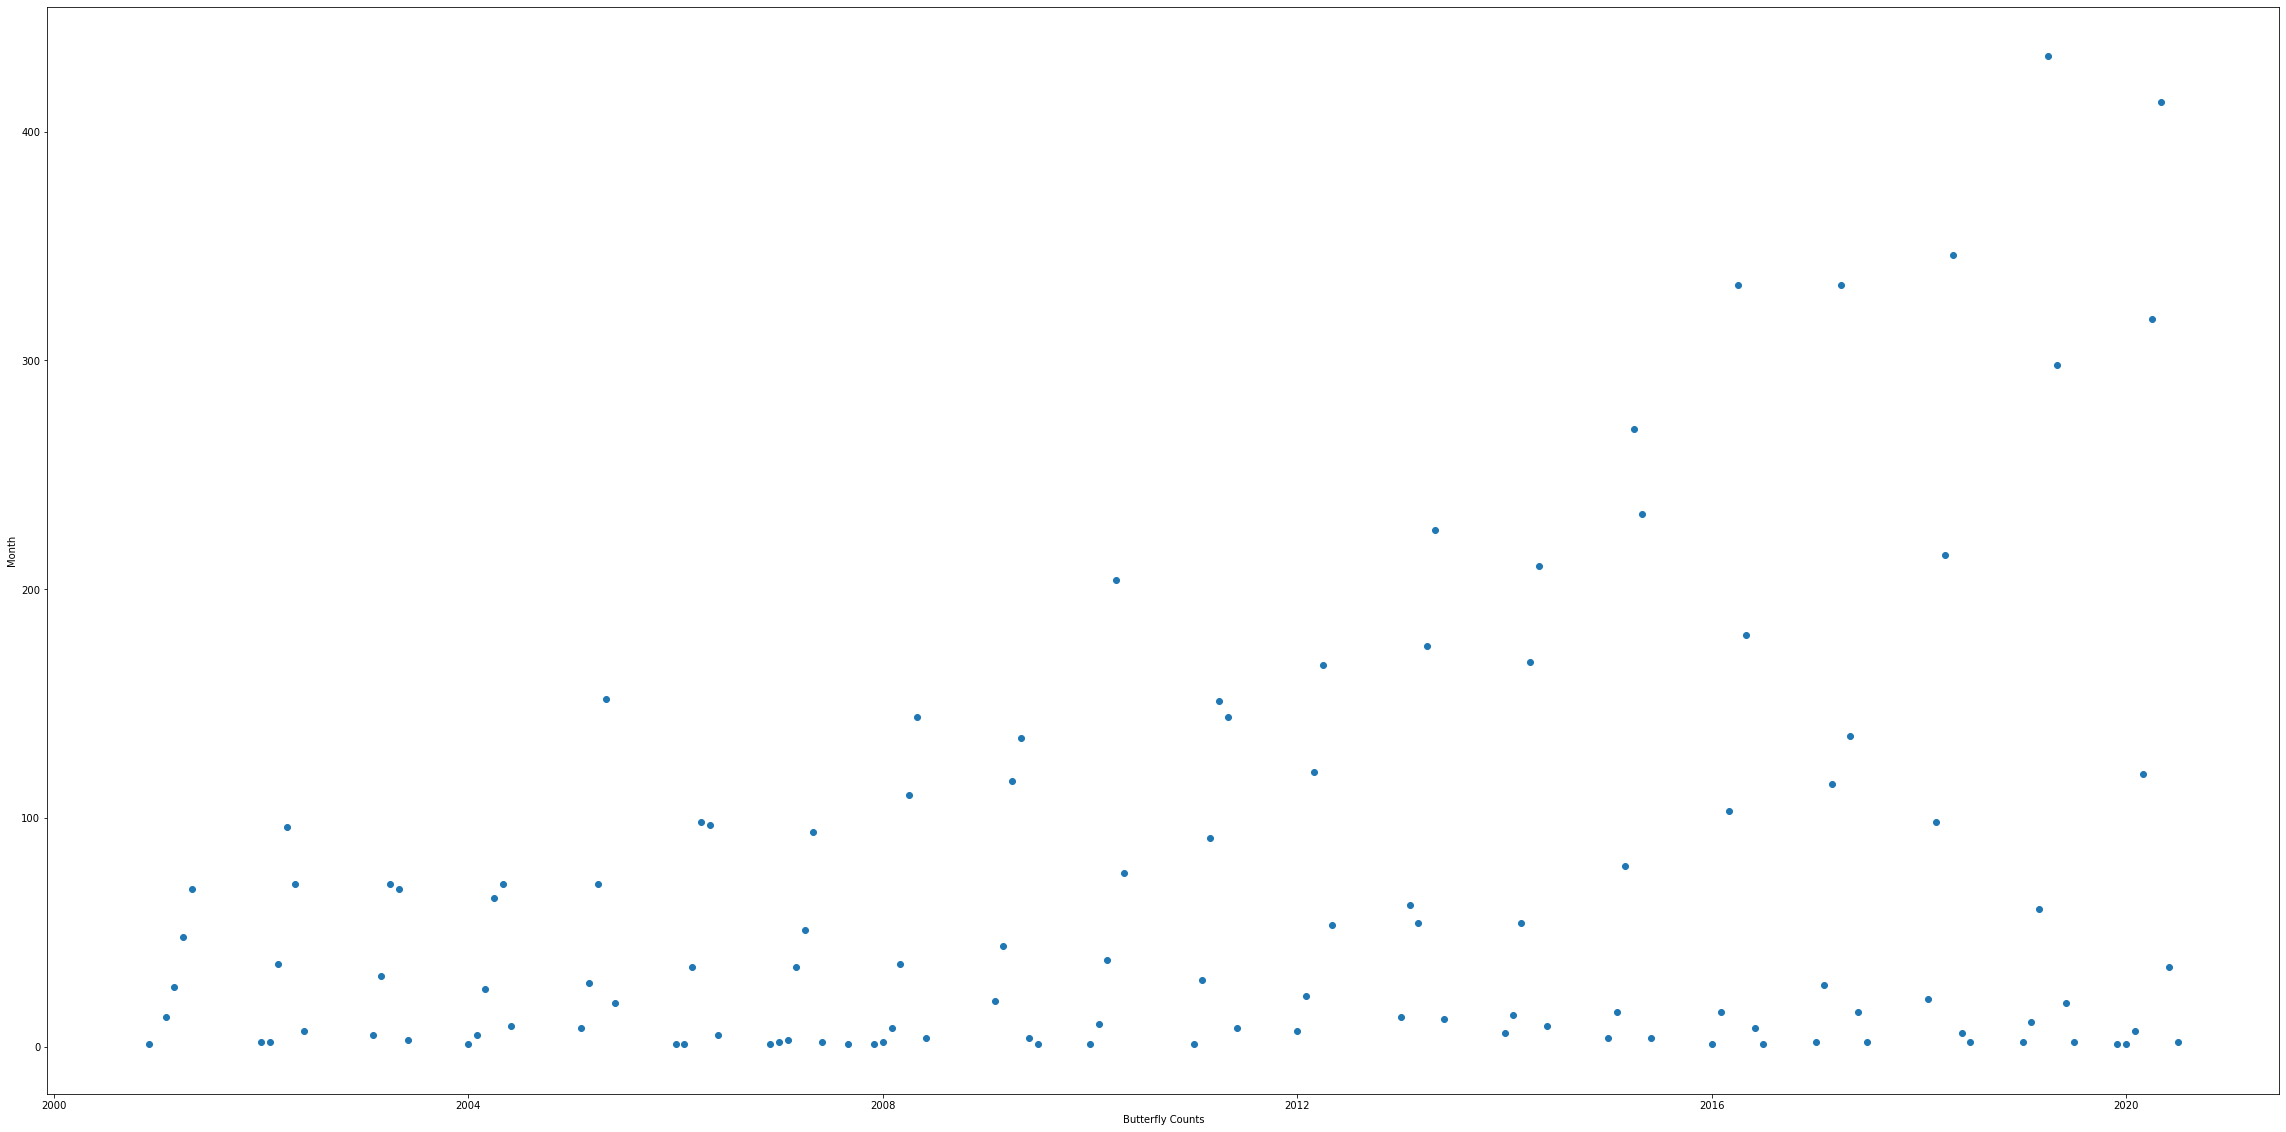

In [7]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
fig = plt.figure(figsize=(40, 20))
plt.scatter(counts.month_and_year, counts.sighting_date)
plt.xlabel('Butterfly Counts')
plt.ylabel('Month')

plt.show()

In [8]:
# using reshape
counts["month_and_year"] = counts["month_and_year"].apply(lambda x: x.toordinal())
#counts["month_and_year"] = counts["month_and_year"].astype(float)
X = counts.month_and_year.values.reshape(-1, 1)


In [9]:
# setting the y axis as the count of dates
y = counts.sighting_date

In [10]:
# setting the model
model = LinearRegression()

In [11]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [12]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(123,)


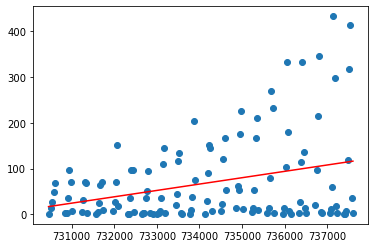

In [13]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [14]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (123, 3)


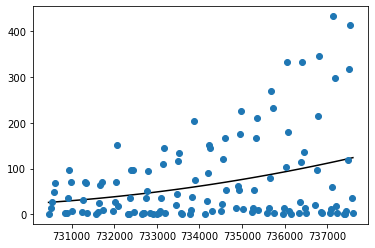

In [15]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (123, 4)


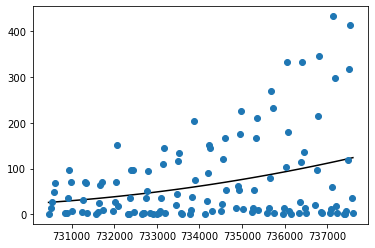

In [16]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (123, 5)


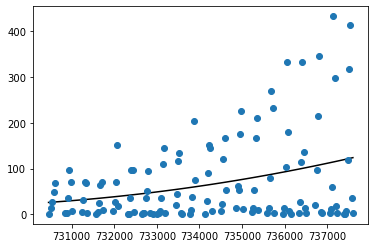

In [17]:
# 4th degree
fit_and_plot_poly_deg(4)